In [1]:
from glob import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
order_dict = {
    'no_bud' : 0,
    'small_mother' : 1,
    'small_daughter' : 2,
    'large_mother' : 3,
    'large_daughter' : 4,
}

In [3]:
csv_files = glob('./*.csv')
dataframes = []
count = 1
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_count = df.groupby(['5class'], as_index=False).count()
    cell_count = {}
    for _, row in df_count.iterrows():
        if row['5class']=='-':
            pass
        else:
            cell_count[row['5class']] = row['SE']
    print(cell_count)
    print(df)
    df_SE = df[df['SE']==1.0].groupby(['5class', 'SE'], as_index=False).count()
    print(df_SE)
    df_SE = df_SE[df_SE['5class']!='-']
    df_SE['count'] = df_SE.apply(lambda row: cell_count[row['5class']], axis=1)
    df_SE['SE_cell'] = df_SE['ratio'] / df_SE['count'] * 100
    df_SE['relative'] = df_SE['SE_cell'].apply\
    (lambda x: x / df_SE[df_SE['5class']=='no_bud']['SE_cell'])
    df_SE['number'] = count
    df_SE['order'] = df_SE['5class'].apply(lambda x: order_dict[x])
    dataframes.append(df_SE)
    count += 1
combined_df = pd.concat(dataframes, ignore_index=True)

{'large_daughter': 242, 'large_mother': 236, 'no_bud': 69, 'small_daughter': 88, 'small_mother': 89}
     Area        X        Y   Perim. classification reference   SE ref_peri  \
0    3389   217.82   37.126  220.652         mother         2  0.0  187.338   
1    2489  272.177   60.163  187.338            bud         1  1.0  220.652   
2    2094  322.127   58.585  172.125             un         -  0.0        -   
3      45  745.833     67.1   26.385            bud         6  0.0  160.953   
4    2943  236.579  102.914  201.966         mother         8  0.0   61.598   
..    ...      ...      ...      ...            ...       ...  ...      ...   
747     1        -        -    1.000            bud        36  0.0  183.823   
748     1        -        -    1.000            bud        57  1.0  207.723   
749     1        -        -    1.000            bud        70  0.0   191.38   
750     1        -        -    1.000            bud        94  0.0  199.581   
751     1        -        -   

In [4]:
combined_df

,5class,SE,Area,X,Y,Perim.,classification,reference,ref_peri,ratio,count,SE_cell,relative,number,order
0,large_daughter,1.0,39,39,39,39,39,39,39,39,242,16.115702,1.389979,1,4
1,large_mother,1.0,14,14,14,14,14,14,14,14,236,5.932203,0.511653,1,3
2,no_bud,1.0,8,8,8,8,8,8,8,8,69,11.594203,1.000000,1,0
3,small_daughter,1.0,1,1,1,1,1,1,1,1,88,1.136364,0.098011,1,2
4,small_mother,1.0,11,11,11,11,11,11,11,11,89,12.359551,1.066011,1,1
5,large_daughter,1.0,41,41,41,41,41,41,41,41,249,16.465863,1.039408,2,4
6,large_mother,1.0,26,26,26,26,26,26,26,26,248,10.483871,0.661794,2,3
7,no_bud,1.0,16,16,16,16,16,16,16,16,101,15.841584,1.000000,2,0
8,small_daughter,1.0,1,1,1,1,1,1,1,1,62,1.612903,0.101815,2,2
9,small_mother,1.0,6,6,6,6,6,6,6,6,59,10.169492,0.641949,2,1


In [23]:
df_agg = combined_df.groupby('5class').mean()
df_agg['SE_cell_sem'] = combined_df.groupby('5class').std()['SE_cell'] / np.sqrt(3)
df_agg

,SE,Area,X,Y,Perim.,classification,reference,ref_peri,ratio,count,SE_cell,relative,number,order,SE_cell_sem
5class,,,,,,,,,,,,,,,
large_daughter,1.0,32.666667,32.666667,32.666667,32.666667,32.666667,32.666667,32.666667,32.666667,229.000000,13.921746,1.049291,2.0,4.0,2.371192
large_mother,1.0,20.333333,20.333333,20.333333,20.333333,20.333333,20.333333,20.333333,20.333333,227.333333,9.007378,0.667738,2.0,3.0,1.537992
no_bud,1.0,13.666667,13.666667,13.666667,13.666667,13.666667,13.666667,13.666667,13.666667,101.000000,13.405914,1.000000,2.0,0.0,1.265182
small_daughter,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.666667,1.236935,0.091684,2.0,2.0,0.194641
small_mother,1.0,9.333333,9.333333,9.333333,9.333333,9.333333,9.333333,9.333333,9.333333,83.666667,11.069551,0.847828,2.0,1.0,0.661596


In [24]:
combined_df.groupby('number').sum()

,5class,SE,Area,X,Y,Perim.,classification,reference,ref_peri,ratio,count,SE_cell,relative,order
number,,,,,,,,,,,,,,
1,large_daughterlarge_motherno_budsmall_daughter...,5.0,73,73,73,73,73,73,73,73,724,47.138023,4.065654,10
2,large_daughterlarge_motherno_budsmall_daughter...,5.0,90,90,90,90,90,90,90,90,719,54.573713,3.444966,10
3,large_daughterlarge_motherno_budsmall_daughter...,5.0,68,68,68,68,68,68,68,68,734,44.212839,3.459004,10


## Tukey

In [25]:
categories = ['no_bud', 'small_mother', 'small_daughter', 'large_mother', 'large_daughter']
SE_cells = [combined_df[combined_df['5class'] == category]['SE_cell'] for category in categories]

# Tukey's HSD test
res = stats.tukey_hsd(*SE_cells)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.336     0.770    -4.267     8.940
 (0 - 2)     12.169     0.001     5.566    18.772
 (0 - 3)      4.399     0.257    -2.205    11.002
 (0 - 4)     -0.516     0.999    -7.119     6.087
 (1 - 0)     -2.336     0.770    -8.940     4.267
 (1 - 2)      9.833     0.004     3.229    16.436
 (1 - 3)      2.062     0.837    -4.541     8.665
 (1 - 4)     -2.852     0.629    -9.455     3.751
 (2 - 0)    -12.169     0.001   -18.772    -5.566
 (2 - 1)     -9.833     0.004   -16.436    -3.229
 (2 - 3)     -7.770     0.020   -14.374    -1.167
 (2 - 4)    -12.685     0.001   -19.288    -6.082
 (3 - 0)     -4.399     0.257   -11.002     2.205
 (3 - 1)     -2.062     0.837    -8.665     4.541
 (3 - 2)      7.770     0.020     1.167    14.374
 (3 - 4)     -4.914     0.179   -11.518     1.689
 (4 - 0)      0.516     0.999    -6.087     7.119
 (4 - 1)      2.852     0.629   

In [26]:
SE_nobud = combined_df[combined_df['5class']=='no_bud']['SE_cell']
SE_sm = combined_df[combined_df['5class']=='small_mother']['SE_cell']
SE_sd = combined_df[combined_df['5class']=='small_daughter']['SE_cell']
SE_lm = combined_df[combined_df['5class']=='large_mother']['SE_cell']
SE_ld = combined_df[combined_df['5class']=='large_daughter']['SE_cell']
res = stats.tukey_hsd(SE_nobud, SE_sm, SE_sd, SE_lm, SE_ld)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.336     0.770    -4.267     8.940
 (0 - 2)     12.169     0.001     5.566    18.772
 (0 - 3)      4.399     0.257    -2.205    11.002
 (0 - 4)     -0.516     0.999    -7.119     6.087
 (1 - 0)     -2.336     0.770    -8.940     4.267
 (1 - 2)      9.833     0.004     3.229    16.436
 (1 - 3)      2.062     0.837    -4.541     8.665
 (1 - 4)     -2.852     0.629    -9.455     3.751
 (2 - 0)    -12.169     0.001   -18.772    -5.566
 (2 - 1)     -9.833     0.004   -16.436    -3.229
 (2 - 3)     -7.770     0.020   -14.374    -1.167
 (2 - 4)    -12.685     0.001   -19.288    -6.082
 (3 - 0)     -4.399     0.257   -11.002     2.205
 (3 - 1)     -2.062     0.837    -8.665     4.541
 (3 - 2)      7.770     0.020     1.167    14.374
 (3 - 4)     -4.914     0.179   -11.518     1.689
 (4 - 0)      0.516     0.999    -6.087     7.119
 (4 - 1)      2.852     0.629   

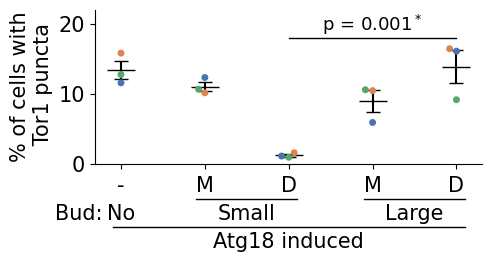

In [46]:
fontsize = 15
fig, ax = plt.subplots(figsize = (5, 2), dpi=100)
sns.swarmplot(x='order', y='SE_cell', hue='number', palette='deep', data=combined_df)
ax.errorbar(x='order', y='SE_cell', yerr='SE_cell_sem', data=df_agg, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels("")
ax.set_xlabel("")
y = -4
y2 = y * 2
ax.text(0, y, "-", ha="center", fontsize=fontsize)
ax.text(-0.5, y2, "Bud:", ha="center", fontsize=fontsize)
ax.text(0, y2, "No", ha="center", fontsize=fontsize)
ax.text(1, y, "M", ha="center", fontsize=fontsize)
ax.text(2, y, "D", ha="center", fontsize=fontsize)
ax.text(3, y, "M", ha="center", fontsize=fontsize)
ax.text(4, y, "D", ha="center", fontsize=fontsize)
ax.plot([0.9, 2.1], [-5, -5], color="black", linewidth=1, clip_on=False)
ax.text(1.5, y2, "Small", ha="center", fontsize=fontsize)
ax.plot([2.9, 4.1], [-5, -5], color="black", linewidth=1, clip_on=False)
ax.text(3.5, y2, "Large", ha="center", fontsize=fontsize)
ax.plot([-0.1, 4.1], [-9, -9], color="black", linewidth=1, clip_on=False)
ax.text(2, y*3, "Atg18 induced", ha="center", fontsize=fontsize)

ax.plot([2, 4], [18, 18], color='k', lw=1)
ax.text(3, 19, 'p = 0.001$^*$', ha='center', fontsize=fontsize-2)

ax.set_ylim(0, 22)
ax.set_yticks([0, 10, 20])
ax.set_yticklabels(["0", "10", "20"], fontsize=fontsize)
ax.set_ylabel("% of cells with\n Tor1 puncta", fontsize=fontsize, loc="center")
ax.legend().remove()

fig.savefig("output.jpg", bbox_inches="tight")
plt.show()